In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [3]:
url = '/content/insurance.csv'
data = pd.read_csv(url)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

data = data.dropna()

X = data.drop(columns='charges')
y = data['charges']

categorical_cols = ['sex', 'smoker', 'region']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head()

,Actual,Predicted
764,9095.06825,8969.550274
887,5272.17580,7068.747443
890,29330.98315,36858.410912
1293,9301.89355,9454.678501
259,33750.29180,26973.173457


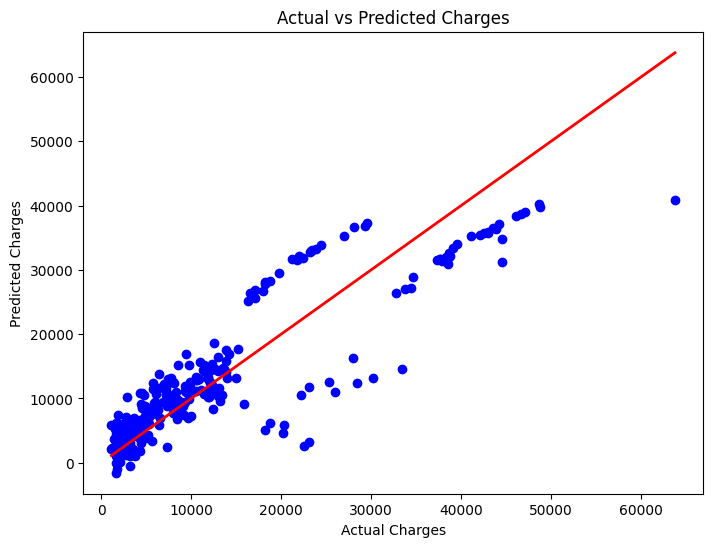

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

In [9]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 33596915.85136147
Root Mean Squared Error (RMSE): 5796.2846592762735
Mean Absolute Error (MAE): 4181.1944737536505
R² Score: 0.7835929767120723


In [11]:
import pickle

In [12]:
with open('insurance_linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved!")

Model saved!


In [13]:
with open('insurance_linear_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_test)

In [14]:
print("\nActual vs Predicted Charges:")
for actual, predicted in zip(y_test.values, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")


Actual vs Predicted Charges:
Actual: 9095.06825, Predicted: 8969.550274436144
Actual: 5272.1758, Predicted: 7068.7474428708665
Actual: 29330.98315, Predicted: 36858.41091154615
Actual: 9301.89355, Predicted: 9454.678500533604
Actual: 33750.2918, Predicted: 26973.17345656349
Actual: 4536.259, Predicted: 10864.113164237362
Actual: 2117.33885, Predicted: 170.2808413649691
Actual: 14210.53595, Predicted: 16903.450286619423
Actual: 3732.6251, Predicted: 1092.430936141147
Actual: 10264.4421, Predicted: 11218.343183516345
Actual: 18259.216, Predicted: 28101.684552669984
Actual: 7256.7231, Predicted: 9377.73460204519
Actual: 3947.4131, Predicted: 5263.059517901975
Actual: 46151.1245, Predicted: 38416.04221106751
Actual: 48673.5588, Predicted: 40255.82339284464
Actual: 44202.6536, Predicted: 37098.253531229086
Actual: 9800.8882, Predicted: 15240.393923059673
Actual: 42969.8527, Predicted: 35912.88264434415
Actual: 8233.0975, Predicted: 9112.52398703116
Actual: 21774.32215, Predicted: 31461.921